In [1]:
%%capture
!pip install qiskit
!pip install pylatexenc

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# **Two-Qubit Search**

Search for the state |11>

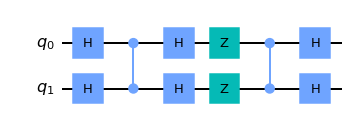

In [ ]:
def initialize_state(qc, qubits):
  for q in qubits: qc.h(q)
  return qc

#oracle specific to |11>
def oracle_setup(qc):
  qc.cz(0,1)
  return qc

#apply diffusion operator U_s
def apply_diffuser(qc):
  qc.h(range(2))
  qc.z(range(2))
  qc.cz(0,1)
  qc.h(range(2))
  return qc


n = 2
qc = QuantumCircuit(n)
grover_qc = initialize_state(qc, range(n))
grover_qc = oracle_setup(grover_qc)
grover_qc = apply_diffuser(grover_qc)
grover_qc.draw(output='mpl')

In [ ]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_qc.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
# from qiskit_textbook.tools import vector2latex
# vector2latex(statevec, pretext="|\\psi\\rangle =")

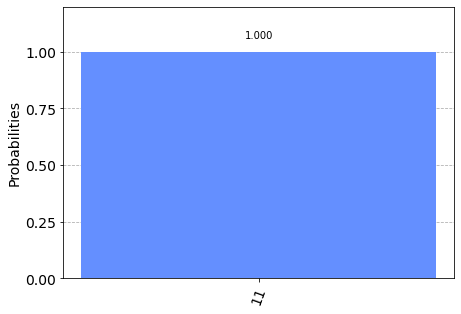

In [ ]:
grover_qc.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

# **3-qubit, 2-Marked-Item Search**

We search for marked items |101> and |110>. 

In [ ]:
#set up specific phase oracle
def three_qubit_oracle(n=3):
  qc = QuantumCircuit(3)
  qc.cz(0, 2)
  qc.cz(1, 2)
  oracle_ex3 = qc.to_gate()
  oracle_ex3.name = "U$_\omega$"
  return oracle_ex3

In [ ]:
#set up general diffuser circuit
def diffuser(nqubits):
  qc = QuantumCircuit(nqubits)
  #add h and x gates
  for qubit in range(nqubits):
    qc.h(qubit); qc.x(qubit)
  #Do multi-controlled-Z gate, using an MCT and using Z = HXH
  qc.h(nqubits-1)
  qc.mct(list(range(nqubits-1)), nqubits-1)
  qc.h(nqubits-1)
  #apply end h and x gates
  for qubit in range(nqubits):
    qc.h(qubit); qc.x(qubit)  
  #We will return the diffusre as a gate
  U_s = qc.to_gate()
  U_s.name = "U$_s$"
  return U_s

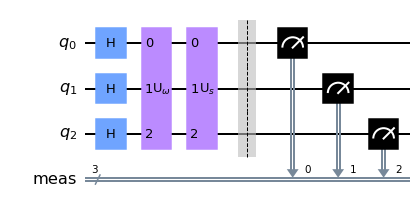

In [ ]:
n=3
qc = QuantumCircuit(n)
qc = initialize_state(qc, [0,1,2])
qc.append(three_qubit_oracle(qc), [0,1,2])
qc.append(diffuser(n), [0,1,2])
qc.measure_all()
qc.draw('mpl')